In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


_______________________________________________________________________________________________________________________________________________________________________________________________
### Fase 2: VISUALIZACIÓN
_______________________________________________________________________________________________________________________________________________________________________________________________

In [2]:
# Leo CSV
df = pd.read_csv('actividad_historial_clientes.csv')

In [3]:
df

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment date,active enrollment
0,480934,2017,1,0,0,0,0,0.0,0,0,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
1,480934,2017,2,3,0,3,2823,282.0,0,0,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
2,480934,2017,3,0,0,0,0,0.0,0,0,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
3,480934,2017,4,0,0,0,0,0.0,0,0,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
4,480934,2018,10,6,2,8,3352,335.0,465,38,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016-02,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,652627,2018,8,0,0,0,0,0.0,0,0,canada,manitoba,winnipeg,r2c 0m5,female,bachelor,75049.0,married,star,83325.38,standard,2015-12,si
403756,652627,2018,9,0,0,0,0,0.0,0,0,canada,manitoba,winnipeg,r2c 0m5,female,bachelor,75049.0,married,star,83325.38,standard,2015-12,si
403757,652627,2018,10,0,0,0,0,0.0,0,0,canada,manitoba,winnipeg,r2c 0m5,female,bachelor,75049.0,married,star,83325.38,standard,2015-12,si
403758,652627,2018,11,0,0,0,0,0.0,0,0,canada,manitoba,winnipeg,r2c 0m5,female,bachelor,75049.0,married,star,83325.38,standard,2015-12,si


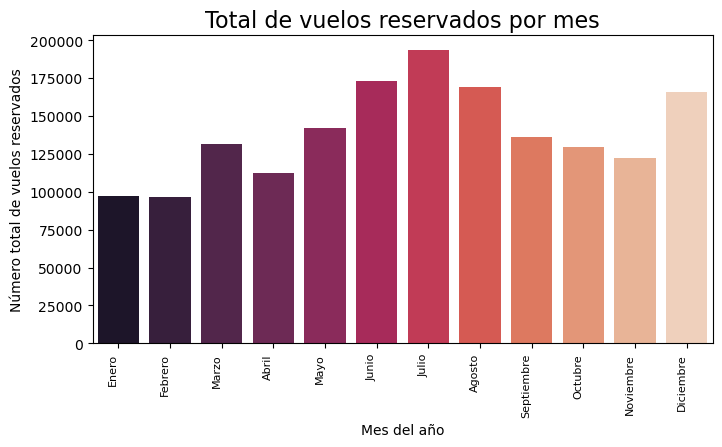

In [4]:
""" Gráfica 1: ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? """

# Barplot. Muestra una estimación de la tendencia central (por defecto, la media) para cada categoría.

# Agrupamos por mes para obtener una única barra por mes y sumamos los vuelos
vuelos_por_mes = df.groupby('month')['flights booked'].sum().reset_index()
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(8, 4))
sns.barplot(data=vuelos_por_mes, x='month', y='flights booked', palette='rocket')
plt.title('Total de vuelos reservados por mes', fontsize=16)
plt.xlabel('Mes del año')
plt.ylabel('Número total de vuelos reservados')
plt.xticks(ticks=range(0, 12), labels=meses, rotation=90, ha='right', fontsize=8)
plt.show()

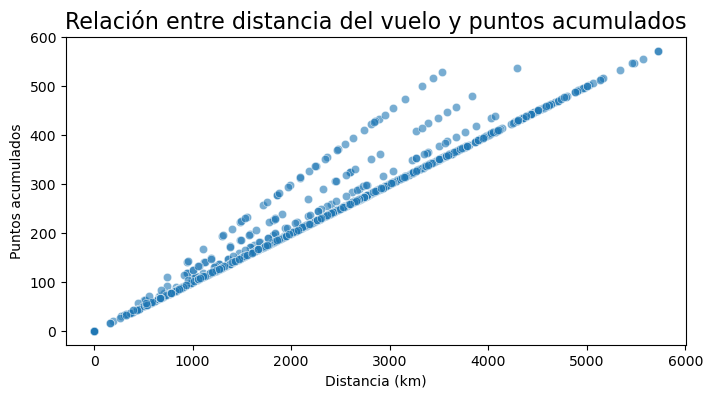

In [5]:
""" Gráfica 2:  ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente? """

#Scatterplot (gráfico de dispersión para dos o más variables, en este caso 2).

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df.sample(n=2000, random_state=1), x='distance', y='points accumulated', alpha=0.6)
plt.title('Relación entre distancia del vuelo y puntos acumulados', fontsize=16)
plt.xlabel('Distancia (km)', fontsize=10)
plt.ylabel('Puntos acumulados', fontsize=10)
plt.show()


In [6]:
""" Gráfica 3:  ¿Cuál es la distribución de los clientes por provincia o estado? """
# Countplot (gráfico de conteo).

# Como en el ejercicio anterior, vuelvo a intentar evitar que aparezcan clientes duplicados.
df_clientes_unicos = df.drop_duplicates(subset=['loyalty number'])

plt.figure(figsize=(15, 5))
sns.countplot(data = df_clientes_unicos, x='province', order=df_clientes_unicos['province'].value_counts().index, palette='Paired')
plt.title('Distribución de clientes por provincia', fontsize=16)
plt.ylabel('Número de clientes', fontsize=12)
plt.xlabel('Provincia', fontsize=12)
plt.show()

--- Creando un DataFrame simulado (reemplazar con la carga de tu CSV) ---
DataFrame simulado 'df_limpio' creado con éxito.



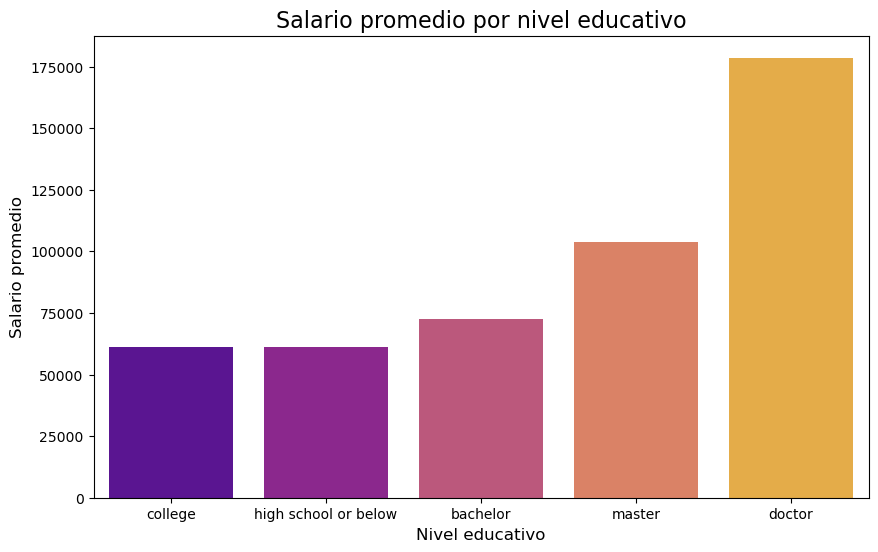

In [8]:
""" Gráfica 4: ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? """

#Barplot: La pregunta pide explícitamente el "salario promedio", y barplot calcula la media por defecto.

#Vuelvo a usar clientes_unicos

plt.figure(figsize=(10, 6)) 
sns.barplot(data=df_clientes_unicos, x='education', y='salary', 
            order=['college','high school or below', 'bachelor', 'master', 'doctor',], palette='plasma' , errorbar=None)
plt.title('Salario promedio por nivel educativo', fontsize=16)
plt.xlabel('Nivel educativo', fontsize=12)
plt.ylabel('Salario promedio', fontsize=12)
plt.show()

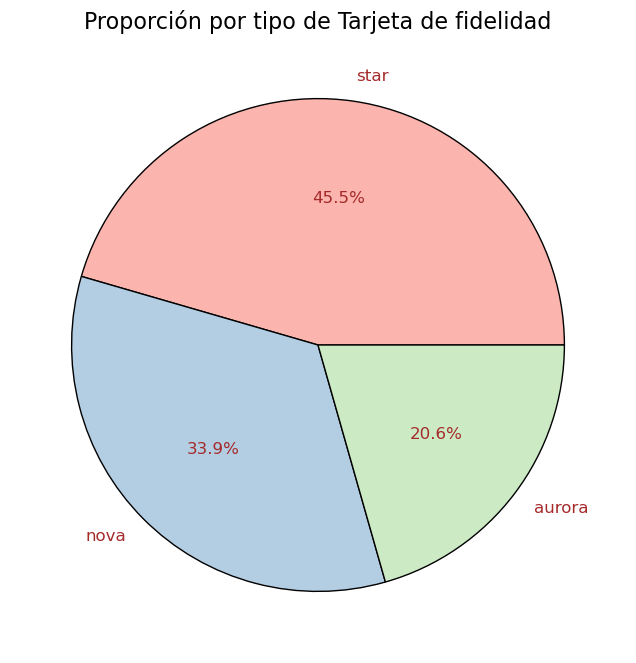

In [9]:
""" Gráfica 5: ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? """

#Vuelvo a usar la variable clientes únicos 

# Pie Chart

plt.figure(figsize=(8, 8))
counts = df['loyalty card'].value_counts()
colors = sns.color_palette('Pastel1')
counts.plot.pie(autopct='%1.1f%%', 
            wedgeprops={'edgecolor': 'black'},
            textprops={'fontsize': 12, 'color':'brown'},
            colors=colors)
plt.title('Proporción por tipo de Tarjeta de fidelidad', fontsize=16)
plt.ylabel('')
plt.show()

Generando Gráfico 6: Estado Civil y Género...


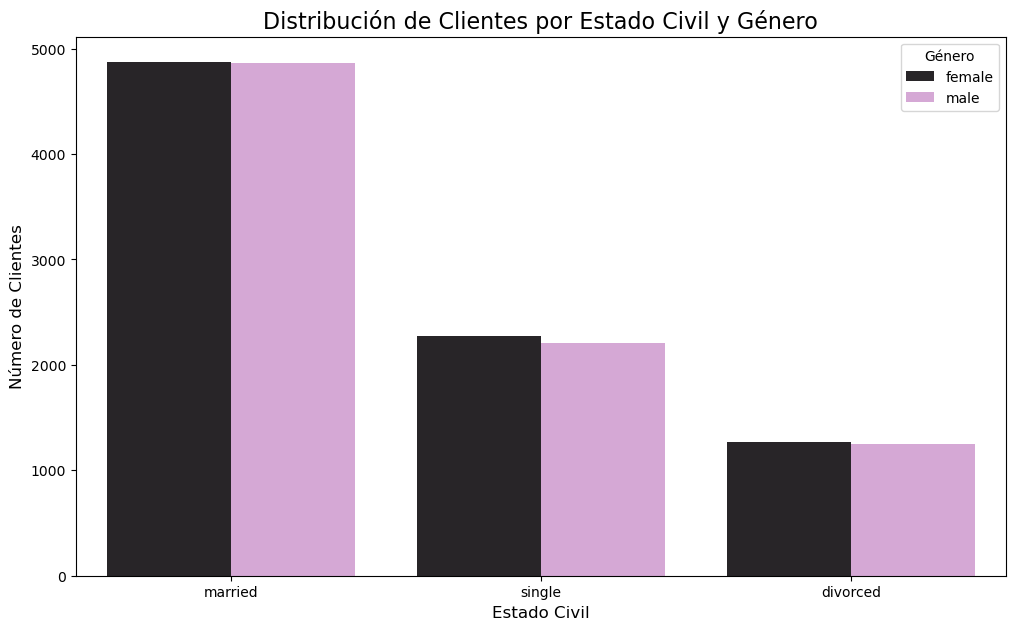

In [10]:
""" Gráfica 6: ¿Cómo se distribuyen los clientes según su estado civil y género? """

# Countplot con el parámetro 'hue'.

print("Generando Gráfico 6: Estado Civil y Género...")
plt.figure(figsize=(12, 7))
sns.countplot(data=df_clientes_unicos, x='marital status', hue='gender', color='plum', order = df_clientes_unicos['marital status'].value_counts().index)
plt.title('Distribución de Clientes por Estado Civil y Género', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Género')
plt.show()


_______________________________________________________________________________________________________________________________________________________________________________________________
### Fase 3: BONUS
_______________________________________________________________________________________________________________________________________________________________________________________________

In [11]:
"""1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:'Flights Booked' y 'Education'."""

try:
    df_bonus = df[['flights booked', 'education']]
    print("Se ha creado el nuevo DF con las columas relevantes")
    display(df_bonus.sample(10))
except Exception as e:
    print(f"Por un error inesperado no se ha podido crear el Df: {e}")

Se ha creado el nuevo DF con las columas relevantes


,flights booked,education
63565,8,bachelor
225764,0,bachelor
385044,0,college
154842,7,bachelor
47393,0,bachelor
104513,0,bachelor
88793,13,bachelor
194714,3,doctor
198432,0,bachelor
207501,8,bachelor


In [12]:
"""2. . Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo"""

estadisticas_por_educacion = df_bonus.groupby('education')['flights booked'].agg(['mean', 'std', 'count'])
print("-"*75)
print("Estadísticas descriptivas de 'Flights Booked' por Nivel Educativo:")
print("-"*75)
print(estadisticas_por_educacion)
print("-"*75)

---------------------------------------------------------------------------
Estadísticas descriptivas de 'Flights Booked' por Nivel Educativo:
---------------------------------------------------------------------------
                          mean       std   count
education                                       
bachelor              4.110288  5.221671  252567
college               4.169744  5.246040  102260
doctor                4.175512  5.256971   17731
high school or below  4.176209  5.239267   18915
master                4.200700  5.213956   12287
---------------------------------------------------------------------------


In [13]:
"""3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos."""

#Me quedé sin tiempo.

#Función del Notebook de clase
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    """# Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50: #aquí vamos a decidir hacer komogorov porque es más potente y shapiro solo en muestras pequeñas
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales, all() solo devuelve True si todos los elementos son True

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")"""